# IVF (Inverted File Index) - Similarity Search

* [Vector Index Basics and the Inverted File Index](https://zilliz.com/blog/vector-index)
* [Nearest Neighbor Indexes for Similarity Search - Inverted File Index](https://www.pinecone.io/learn/series/faiss/vector-indexes/#Inverted-File-Index)
* [Choosing the Right Vector Index for Your Project](https://zilliz.com/learn/choosing-right-vector-index-for-your-project)
* [Visual Embedding Vectors](https://github.com/zilliztech/feder)
* [Powering Semantic Similarity Search in Computer Vision with State of the Art Embeddings](https://zilliz.com/learn/embedding-generation)
* [Vector Search Codes](https://github.com/fzliu/vector-search)

In [ ]:
!pip install faiss-cpu usearch

In [34]:
!pip list config

Package                   Version
------------------------- ---------
absl-py                   1.4.0
aiohttp                   3.8.5
aiosignal                 1.3.1
annoy                     1.17.3
anyio                     3.7.1
appdirs                   1.4.4
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
arrow                     1.2.3
asttokens                 2.2.1
async-lru                 2.0.4
async-timeout             4.0.3
attrs                     23.1.0
Babel                     2.12.1
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    6.0.0
blis                      0.7.10
cachetools                5.3.1
catalogue                 2.0.9
certifi                   2023.7.22
cffi                      1.15.1
charset-normalizer        3.2.0
click                     8.1.7
cloudpickle               2.2.1
colorama                  0.4.6
comm                      0.1.4
confection                0.1.1
contourpy             


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Explanation

The IVF (Inverted File Index) separate the data by the nearest neighbor, on the image below, the black dots represent the centroids of the clusters. And each diferent color, is an example of the objects in a latent space must nearby the centroid cluster. To search the nearest neighbors, you fist compare the data to all centroids, instead of compare the element to each element of the entire array (like is done in flat index) that can make the running time slow (but more accurate) if it has a lot of elements. After that, for the nearest centroid (or centroids, if you use n_probe in FAISS for example), you compare the data the index of that centroid only (or with the n_probe > 1 nearest centroids).

![Voronoi Diagram](voronoi_diagram.png)
<small>A two-dimensional Voronoi diagram. Image by Balu Ertl, CC BY-SA 4.0.</small>

## Code from tutorial using random data

In [2]:
import numpy as np

query = np.random.normal(size=(128,))
dataset = np.random.normal(size=(1000, 128))
nearest = np.argmin(np.linalg.norm(dataset - query, axis=1))
nearest

822

In [3]:
import numpy as np
from scipy.cluster.vq import kmeans2

num_part = 16  # number of IVF partitions
dataset = np.random.normal(size=(1000, 128))
(centroids, labels) = kmeans2(dataset, num_part, iter=100)

print(centroids.shape)
print(labels.shape)

(16, 128)
(1000,)


In [4]:
test = [np.argmin(np.linalg.norm(vec - centroids, axis=1)) for vec in dataset]
np.all(test == labels)

True

In [5]:
centroids

array([[-0.2627213 ,  0.15339438, -0.02232731, ...,  0.00527192,
         0.29102054, -0.00527171],
       [-0.07952517, -0.00309038, -0.11678001, ...,  0.03825891,
        -0.08782394,  0.33595767],
       [-0.30011086,  0.28248728, -0.34921226, ..., -0.00561064,
        -0.17145961,  0.20426774],
       ...,
       [ 0.29966175, -0.25738176,  0.61571442, ..., -0.15824078,
         0.79308201, -0.02446975],
       [-0.07596544,  0.21421458, -0.16567196, ..., -0.32049411,
        -0.14964052, -0.12744169],
       [-0.0132544 ,  0.17907895, -0.04719109, ..., -0.05992782,
         0.0089093 , -0.25712316]])

In [6]:
labels

array([ 3,  5,  1,  1, 10,  0,  8,  7, 14,  7,  1,  8,  3,  3,  8,  7, 12,
        3,  8,  5,  5, 12,  8,  9,  6, 14,  1,  6, 12, 13,  1,  5,  0,  5,
        5, 14,  5,  8,  1,  0,  5,  2,  8,  4, 14, 10,  2,  0, 14,  6,  1,
        6,  0, 15,  4,  1,  2,  9,  7,  0,  5, 14, 10,  3, 14,  3, 13,  3,
       14,  5,  1,  5,  5,  1,  3,  4,  1,  1,  2,  0,  0,  0,  2,  8,  8,
        1,  2, 11,  8,  8,  1, 10, 15, 10,  9, 12,  5,  1,  5,  2,  3,  1,
        8,  2,  2, 14,  7,  9,  5,  5,  4, 15,  6, 12,  6, 13, 14,  5,  2,
        3,  5,  7, 15,  2,  6, 12, 14, 12, 15,  7,  8,  1,  4,  9,  6,  8,
        5, 12,  0,  1,  8, 10,  2, 13, 13, 13, 12,  0,  3, 14,  2, 10,  0,
        5,  8, 11, 12, 13,  1,  2,  6,  3,  0,  9,  0,  0,  0,  4, 15,  1,
        7,  3, 14, 11, 14, 14, 14,  3,  4, 12,  1,  0,  4,  3,  9,  2, 12,
        5,  1, 10,  5, 12, 10,  3,  1,  7,  4,  6, 11, 15,  8, 15,  4, 10,
        1, 15,  2,  5,  5,  4, 13, 10,  7,  1, 14, 14,  8,  8,  4,  1,  1,
        3, 10,  0,  5,  3

In [7]:
index = [[] for _ in range(num_part)]
for n, k in enumerate(labels):
    index[k].append(n)  # the nth vector gets added to the kth cluster

In [8]:
query = np.random.normal(size=(128,))
closed_centroid_idx = np.argmin(np.linalg.norm(centroids - query, axis=1))  # find the nearest partition
nearest = np.argmin(np.linalg.norm(dataset[index[closed_centroid_idx]] - query, axis=1))  # find nearest neighbor
nearest

5

## Code using numpy and KMeans FAISS only

- [Faiss building blocks: clustering, PCA, quantization](https://github.com/facebookresearch/faiss/wiki/Faiss-building-blocks:-clustering,-PCA,-quantization)

In [9]:
import os
import sys
import shutil
import pandas as pd
import numpy as np 
import plotly.express as px

from PIL import Image
from random import randint
from tqdm import tqdm
from annoy import AnnoyIndex
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

tqdm.pandas()

if os.path.exists("image_df.pkl"):
    image_df = pd.read_pickle("image_df.pkl")
else:
    print("RUN THE TUTORIAL 1_similarity_search.ipynb")

In [10]:
image_df.head()

,img_path,embedding,simclr_embeddings,clip_image_embedding
0,../data/cv/fashion/1000000151.jpg,"[0.0, 0.13571438, 0.07747779, 0.0, 0.06867723,...","[0.0, 0.0, 0.0, 0.016052447259426117, 0.067167...","[-0.08758709579706192, -0.3124939203262329, 0...."
1,../data/cv/fashion/1000000170.jpg,"[0.020778598, 0.09365222, 0.10665407, 0.051480...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03924274817109108, -0.040139153599739075, ..."
2,../data/cv/fashion/1000001050.jpg,"[0.0, 0.017002566, 0.0101805935, 0.00038356014...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.07215095311403275, -0.07616670429706573, 0..."
3,../data/cv/fashion/1000001113.jpg,"[0.0, 0.032862574, 0.0, 0.0, 0.16102254, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.10626209527254105, 0.0,...","[0.12239596992731094, 0.23508524894714355, 0.2..."
4,../data/cv/fashion/1000001117.jpg,"[0.07896162, 0.0087613, 0.06798893, 0.0, 0.055...","[0.0, 0.0, 0.0, 0.0, 0.014906682074069977, 0.0...","[0.24037981033325195, 0.0034865587949752808, 0..."


In [11]:
embeddings = image_df["clip_image_embedding"]
embeddings = embeddings.to_numpy()
embeddings = np.array([np.array(embedding) for embedding in embeddings])
embeddings.shape

(6239, 512)

In [12]:
import faiss

dimensions = embeddings.shape[1]
ncentroids = 16
kmeans = faiss.Kmeans(dimensions, ncentroids, niter=100, verbose=True)
kmeans.train(embeddings)

92301.2421875

In [13]:
kmeans.centroids.shape

(16, 512)

In [14]:
kmeans.centroids

array([[ 0.10395303,  0.3082302 ,  0.13596463, ...,  0.57308155,
         0.06856904,  0.577654  ],
       [ 0.10552835,  0.20392586, -0.02392849, ...,  0.5068717 ,
         0.00196545,  0.49388564],
       [-0.01504911, -0.22645465,  0.28497994, ...,  0.38455737,
         0.31210804,  0.27637482],
       ...,
       [-0.10595742, -0.01551262,  0.02340811, ...,  0.4867789 ,
        -0.14340286,  0.44802856],
       [ 0.20122711, -0.00715628, -0.169831  , ...,  0.58908564,
        -0.14825353,  0.3887506 ],
       [ 0.08603758,  0.00704818, -0.1352525 , ...,  0.23618929,
         0.04212165,  0.31387976]], dtype=float32)

In [22]:
def create_index() -> list:
    index = [[] for _ in range(ncentroids)]
    for emb_idx in range(len(embeddings)):
        embedding = embeddings[emb_idx]
        _, centroid = kmeans.index.search(np.array([embedding]), 1)
        centroid_id = centroid[0][0]
        index[centroid_id].append(emb_idx)

    return index

index = create_index()

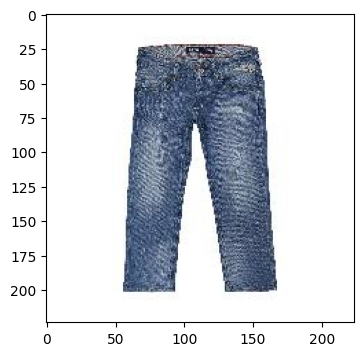

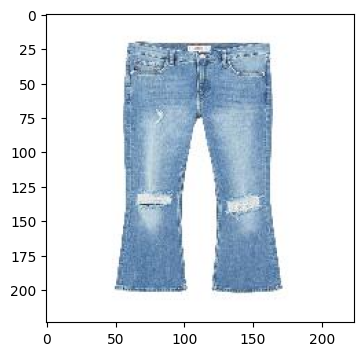

In [31]:
query_id = randint(0, len(embeddings))
query = embeddings[query_id]

_, centroid = kmeans.index.search(np.array([query]), 1)
nearest = centroid[0][0]

with Image.open(image_df["img_path"][query_id]) as img:
    img = img.convert("RGB")
    plt.figure(figsize=(20, 4))
    plt.imshow(img)

with Image.open(image_df["img_path"][nearest]) as img:
    img = img.convert("RGB")
    plt.figure(figsize=(20, 4))
    plt.imshow(img)

## Code using Faiss IVF

* [Reference](https://github.com/facebookresearch/faiss/wiki/Getting-started)

In [50]:
import faiss

from typing import Tuple, List
from scipy.cluster.vq import kmeans2
from sentence_transformers import SentenceTransformer

class FaissIVF:

    def __init__(self):
        self.model = SentenceTransformer("clip-ViT-B-32")
    
    def train(self, dataset: np.array, num_part = 16):
        """
        :dataset: contains the embeddings
        :num_part: number of IVF partitions
        :iterations: number of iterations to train kmeans
        """
        input_size = dataset.shape[1]
        quantizer = faiss.IndexFlatL2(input_size)
        index = faiss.IndexIVFFlat(quantizer, input_size, num_part)
        
        index.train(embeddings)
        index.add(embeddings)
   
        self.dataset = dataset
        self.index = index

    def search(self, query: np.array, nprobe=1) -> int:
        index = self.index
        index.nprobe = nprobe
        if query.shape == (512,):
            query = np.expand_dims(query, axis=0)
        distances, nearest_indices = index.search(query, 1)
        return nearest_indices[0][0]

    def search_index(self, query_index: int, nprobe=1) -> int:
        index = self.index
        index.nprobe = nprobe
        query = np.expand_dims(self.dataset[query_index], axis=0)
        distances, nearest_indices = index.search(x=query, k=1)
        return nearest_indices[0][0]

    def search_index_aknn(self, query_index: int, nprobe=1, k_neighbors=5) -> Tuple:
        index = self.index
        index.nprobe = nprobe   
        query = np.expand_dims(self.dataset[query_index], axis=0)
        distances, nearest_indices = index.search(query, k_neighbors)
        return np.squeeze(distances),  np.squeeze(nearest_indices)
    
    def search_aknn(self, query: np.array, nprobe=1, k_neighbors=5) -> Tuple:
        index = self.index
        index.nprobe = nprobe
        if query.shape == (512,):
            query = np.expand_dims(query, axis=0)
        distances, nearest_indices = index.search(query, k_neighbors)
        return  np.squeeze(distances),  np.squeeze(nearest_indices)

    def plot_similar(self, df: pd.DataFrame, query_index: int, nprobe=1, k_neighbors=5):
        """
        Helper function to take a dataframe index as input query 
        and display the k nearest neighbors
        """
        
        distances, nearest_indices = self.search_index_aknn(query_index, nprobe, k_neighbors)
    
        # Plot input image
        with Image.open(df["img_path"][query_index]) as img:
            img = img.convert("RGB")
            plt.imshow(img)
        plt.title(f"Query Product: {query_index}")
    
        # Plot nearest neighbors images
        fig = plt.figure(figsize=(20, 4))
        plt.suptitle("Similar Products")
        for idx, neighbor in enumerate(nearest_indices):
            plt.subplot(1, len(nearest_indices), idx+1)
            with Image.open(df["img_path"][neighbor]) as img:
                img = img.convert("RGB")
                plt.imshow(img)
                plt.title(f"Distance: {distances[idx]:.3f}")
        plt.tight_layout()

    def text_image_search(self, df: pd.DataFrame, text_query: str, nprobe=1, k_neighbors=5):
        """
        Helper function to take a text query as input and display the k nearest neighbor images
        """
    
        # Calculate the text embeddings
        text_emb = self.model.encode(text_query)
        distances, nearest_indices = self.search_aknn(text_emb, nprobe, k_neighbors)

        # Print query text
        print(f"Query text: {text_query}")
    
        # Plot nearest neighbors images
        fig = plt.figure(figsize=(20, 4))
        plt.suptitle("Similar Products")
        for idx, neighbor in enumerate(nearest_indices):
            plt.subplot(1, len(nearest_indices), idx+1)
            with Image.open(df["img_path"][neighbor]) as img:
                img = img.convert("RGB")
                plt.imshow(img)
                plt.title(f"Distance: {distances[idx]:.3f}")
        plt.tight_layout()

In [51]:
faiss_ivf = FaissIVF()
faiss_ivf.train(embeddings, num_part=16)

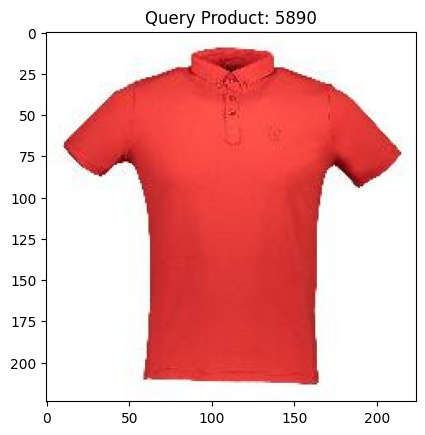

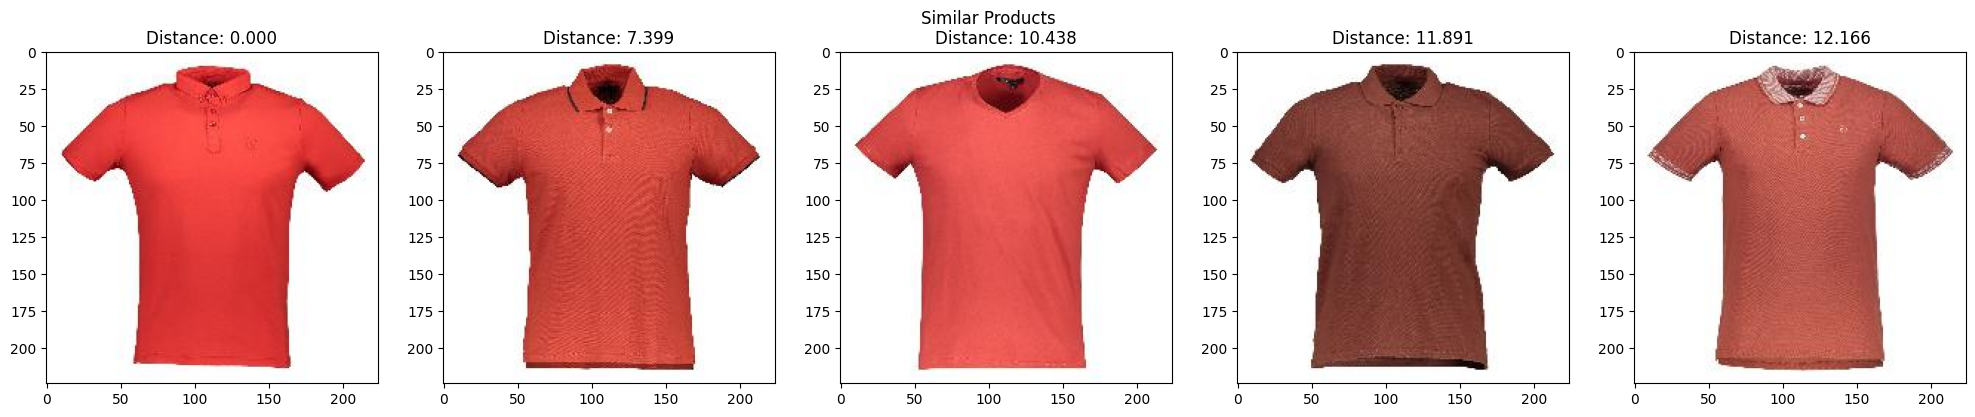

In [52]:
faiss_ivf.plot_similar(df=image_df, query_index=5890, k_neighbors=5)

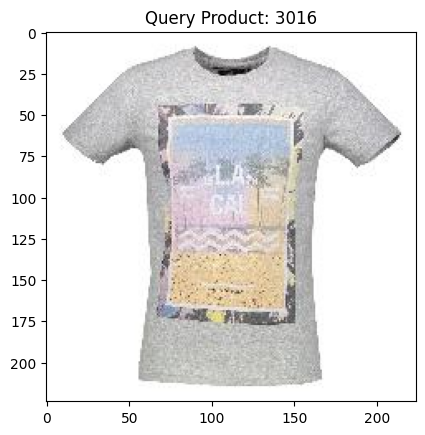

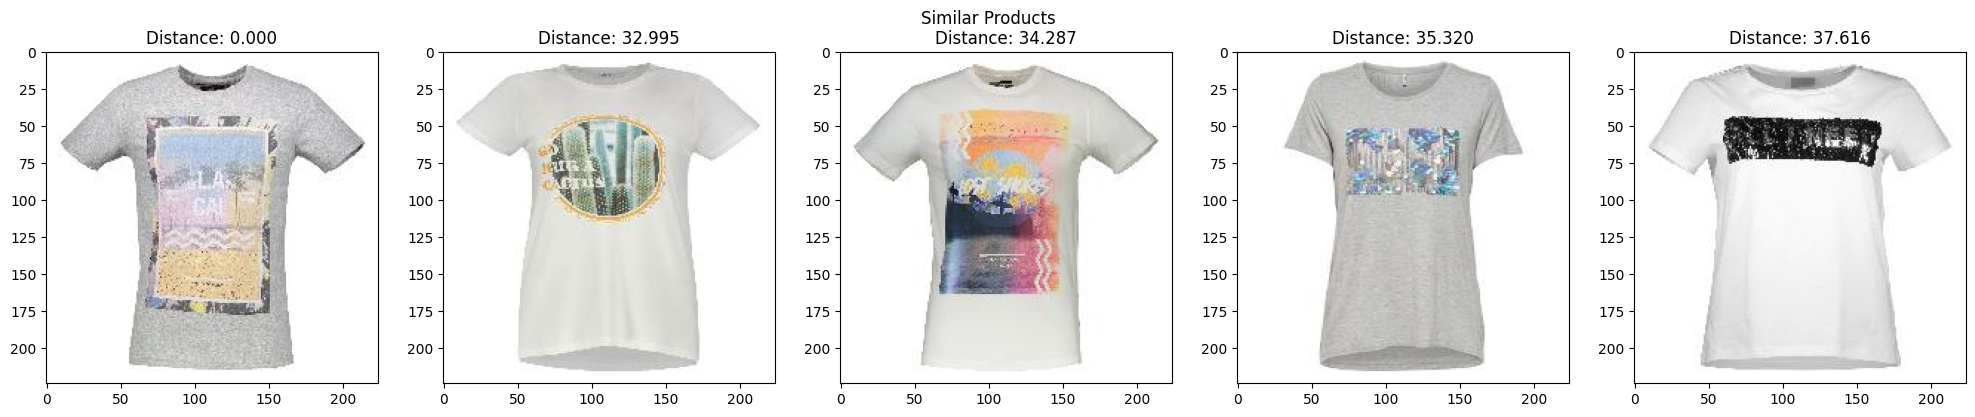

In [53]:
faiss_ivf.plot_similar(df=image_df, query_index=randint(0, len(image_df)), k_neighbors=5)

Query text: A blue shirt


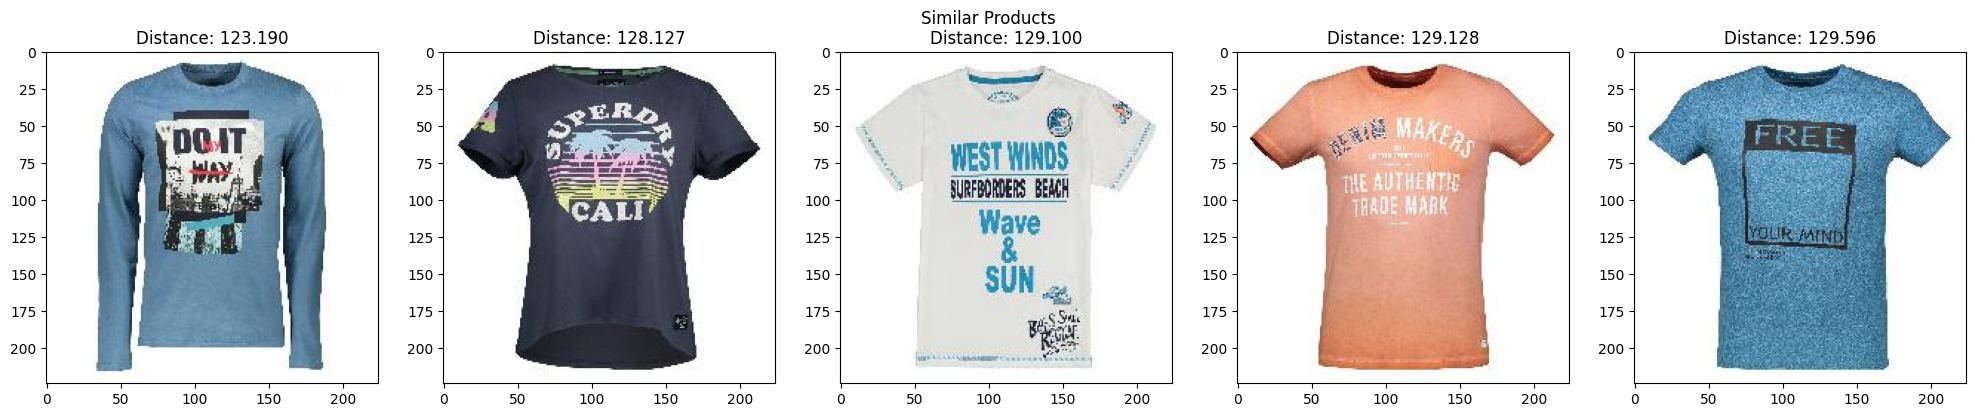

In [54]:
faiss_ivf.text_image_search(df=image_df, text_query="A blue shirt")

Query text: Brilliant necklace


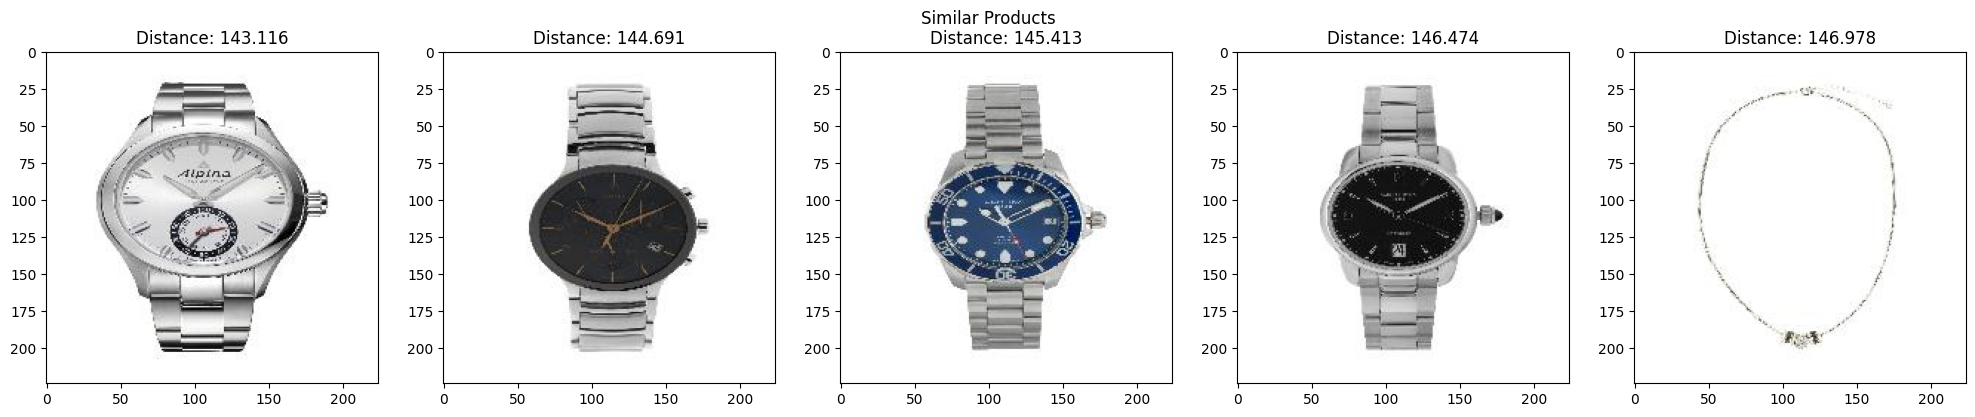

In [63]:
faiss_ivf.text_image_search(df=image_df, text_query="Brilliant necklace")

Query text: A small watch


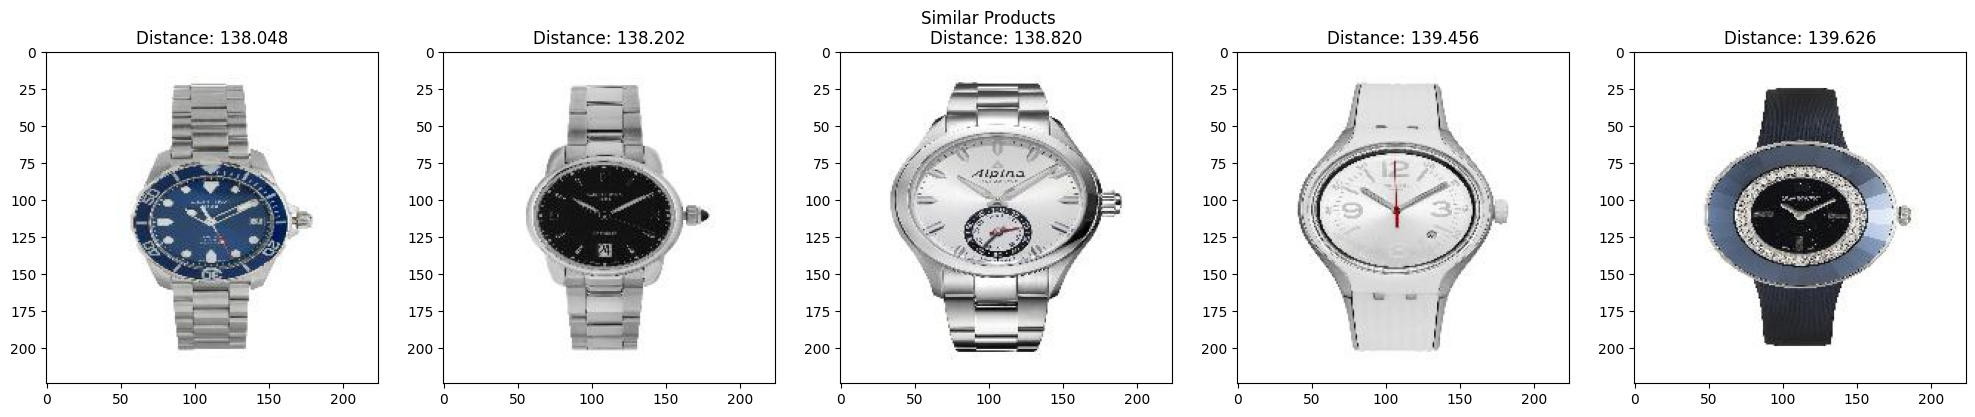

In [60]:
faiss_ivf.text_image_search(df=image_df, text_query="A small watch")

## Code using USearch IVF

* [Reference](https://github.com/facebookresearch/faiss/wiki/Getting-started)